In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (20, 12)

In [3]:
df = pd.read_csv('IoU.csv')

In [4]:
df_z = df.loc[df['IoU'] == 0]
df_nz = df.loc[df['IoU'] != 0]

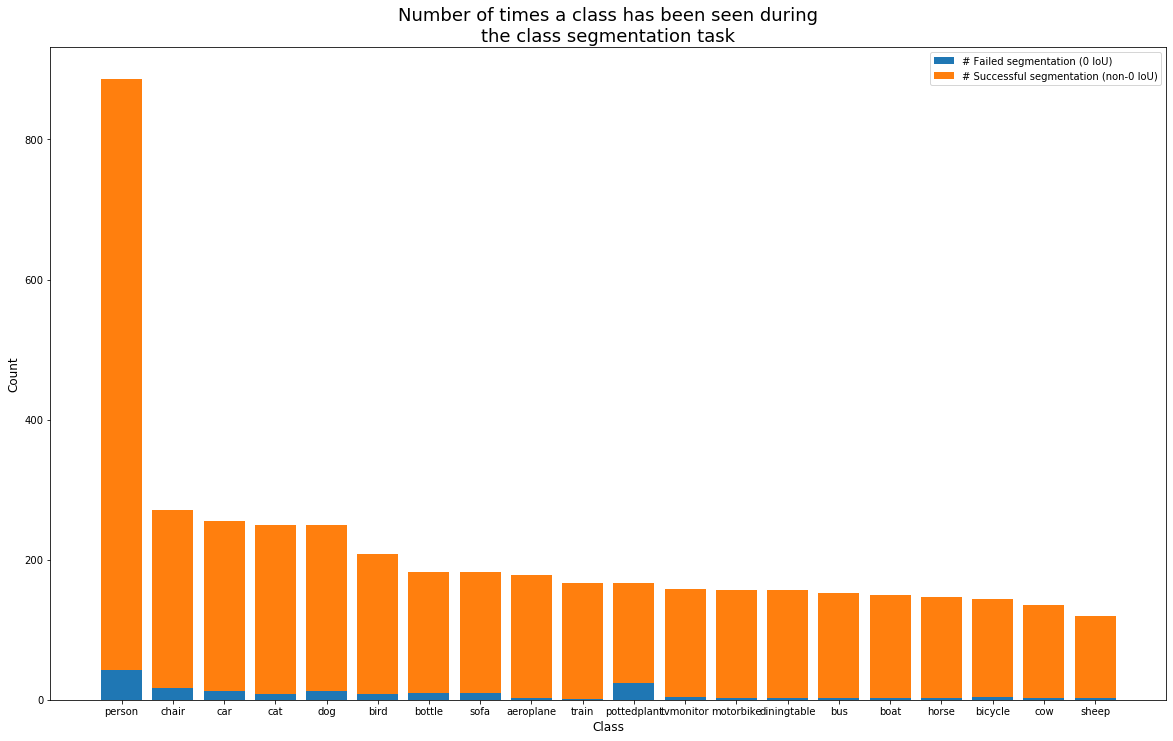

In [5]:
count_z = df_z.groupby(['Class']).size().reset_index(name='Count_z').set_index('Class')
count_nz = df_nz.groupby(['Class']).size().reset_index(name='Count_nz').set_index('Class')

count = pd.concat([count_z, count_nz], axis=1)
count['Count'] = count['Count_z'] + count['Count_nz']
count = count.sort_values(by=['Count'], ascending=False)

fig, ax = plt.subplots()

ax.bar(count.index, count['Count_z'], label='# Failed segmentation (0 IoU)')
ax.bar(count.index, count['Count_nz'], bottom = count['Count_z'], label='# Successful segmentation (non-0 IoU)')

ax.set_ylabel('Count', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title(f'Number of times a class has been seen during\nthe class segmentation task',
             fontsize = 18)
ax.legend()

plt.show()
fig.savefig("Count by class.jpg")

In [6]:
mIoU2 = df.groupby(['Class'], as_index=False).agg(['mean', 'std'])
mIoU2 = mIoU2.sort_values(by=[('IoU','mean')], ascending=False)

No handles with labels found to put in legend.


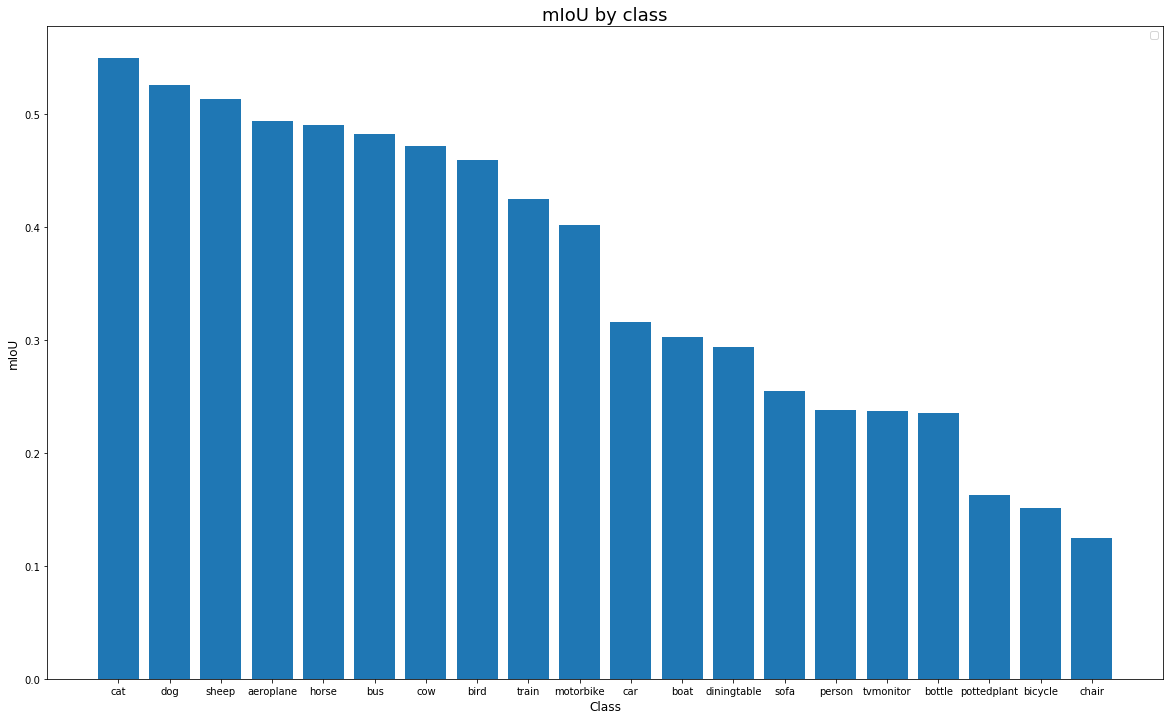

In [7]:
mIoU = df.groupby(['Class']).mean()
mIoU = mIoU.sort_values(by=['IoU'], ascending=False)

fig, ax = plt.subplots()

ax.bar(mIoU.index, mIoU['IoU'])
ax.set_ylabel('mIoU', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title('mIoU by class', fontsize = 18)
ax.legend()

plt.show()
fig.savefig("mIoU by class.jpg")

In [8]:
path = r'C:\Users\Nicol\Documents\EPFL\BA7\Project\Code\voc\sessions\3 Class cam\\'

df_cam = pd.read_csv(path + 'IoU.csv')

In [9]:
df_c = pd.DataFrame(list(zip(df['Class'], df['IoU'], df_cam['IoU'])),
               columns =['Class', 'IoU gccam', 'IoU cam'])

In [21]:
print('Task: Class segmentation')
print('Images  ', len(np.unique(df['Name'])))
print('Classes ', len(df))
print('mIoU of cam         =', "{:.3f}".format(df_c['IoU cam'].mean()))
print('mIoU of grabcut-cam =', "{:.3f}".format(df_c['IoU gccam'].mean()))

Task: Object (instance) segmentation with bboxes 
Images   2913 
Objects  6929 
mIoU of grabcut-bbox     = 0.521
mIoU of grabcut-cam-bbox = 0.470 

Task: Class segmentation
Images   2913
Classes  4318
mIoU of cam         = 0.274
mIoU of grabcut-cam = 0.336


In [10]:
mIoU_c = df_c.groupby(['Class']).mean()
mIoU_c = mIoU_c.sort_values(by=['IoU gccam'], ascending=False)

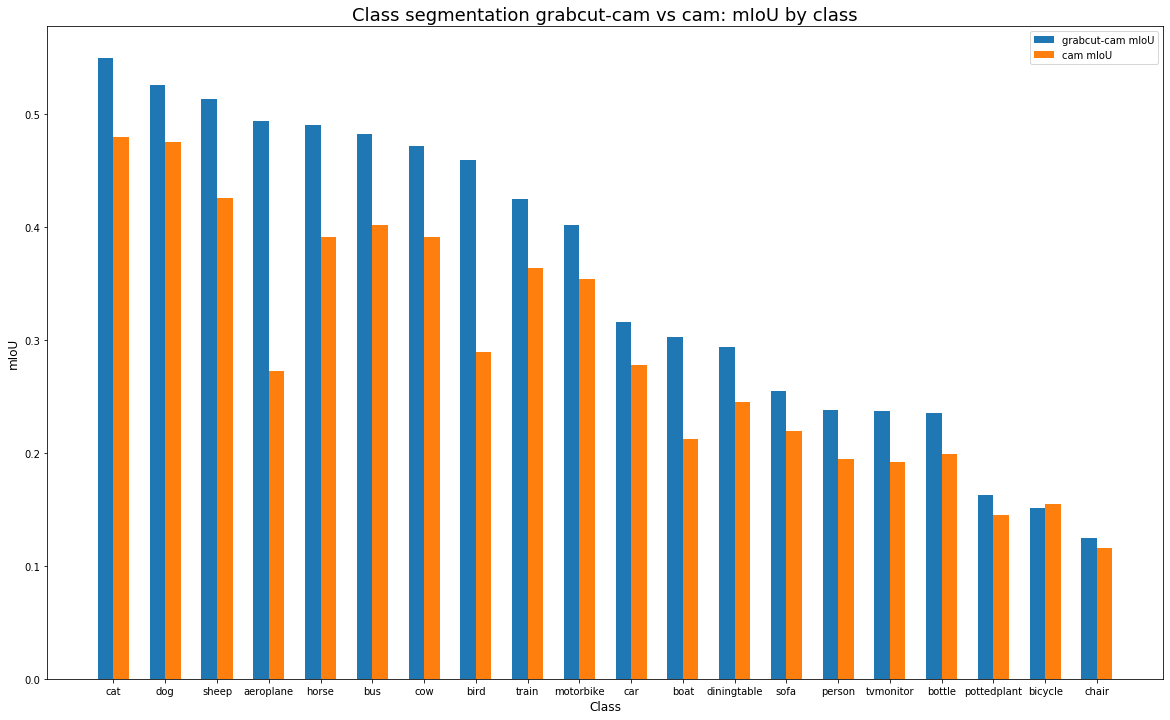

In [14]:
fig, ax = plt.subplots()

ind = np.arange(len(mIoU_c))
width = 0.3   
ax.bar(ind, mIoU_c['IoU gccam'], width, label = "grabcut-cam mIoU")
ax.bar(ind + width, mIoU_c['IoU cam'], width, label = "cam mIoU")
ax.set_ylabel('mIoU', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12)
ax.set_title('Class segmentation grabcut-cam vs cam: mIoU by class', fontsize = 18)
ax.legend()
plt.xticks(ind + width / 2, mIoU_c.index)

plt.show()
fig.savefig("Class sgm - mIoU by class gc-cam vs cam.jpg")